#### Prompt Chaining
Prompt chaining is a technique in natural language processing where multiple prompts are sequenced together to guide a model through a complex task or reasoning process. Instead of relying on a single prompt to achieve a desired outcome, prompt chaining breaks the task into smaller, manageable steps, with each step building on the previous one. This approach can improve accuracy, coherence, and control when working with large language models.
LangGraph, is a framework designed to facilitate structured interactions with language models, making it an excellent tool for implementing prompt chaining. It allows you to define a graph of nodes (representing individual prompts or tasks) and edges (representing the flow of information between them). This structure enables dynamic, multi-step conversations or workflows, where the output of one node can feed into the input of the next.


#### How Prompt Chaining Works with LangGraph
1. Define the Task: Start by breaking down the problem into smaller sub-tasks. For example, if you want to generate a detailed report, you might split it into steps like "gather data," "analyze data," and "write summary."

2. Create Nodes: Each sub-task becomes a node in the LangGraph structure. A node could be a prompt that instructs the model to perform a specific action, such as "List key facts about X" or "Summarize the following text."

3. Establish Edges: Edges define the sequence and dependencies between nodes. For instance, the output of the "gather data" node flows into the "analyze data" node, ensuring the model has the necessary context to proceed.

4. Execute the Graph: LangGraph processes the nodes in order, passing information along the edges. The model generates responses step-by-step, refining the output as it progresses through the chain.

5. Iterate if Needed: LangGraph supports conditional logic and loops, so you can revisit earlier nodes or adjust the flow based on intermediate results.

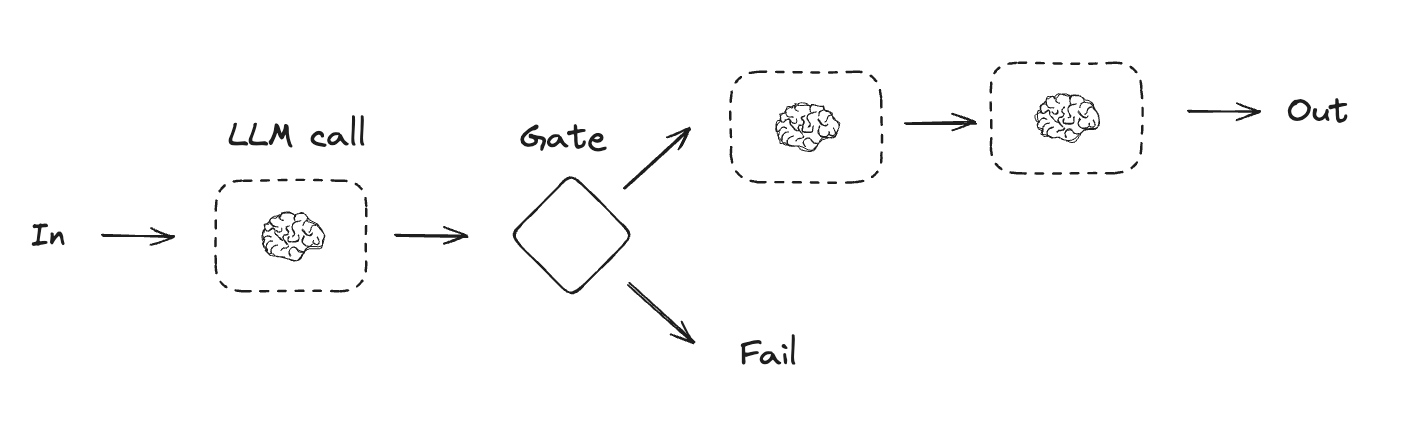



In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq


#os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


llm=ChatGroq(model="qwen-qwq-32b")
#llm = ChatOpenAI(model="gpt-4o")
result=llm.invoke("Hello")
result

AIMessage(content='\n<think>\nOkay, the user said "Hello". I need to respond in a friendly way. Let me see... Maybe start with a greeting like "Hi there!" to keep it casual. Then ask how I can assist them today. I should keep it open-ended so they can ask anything. Let me check if that\'s too short. Hmm, maybe add an emoji to make it welcoming. Yep, that should work. Alright, send it.\n</think>\n\nHi there! 😊 How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 103, 'prompt_tokens': 11, 'total_tokens': 114, 'completion_time': 0.249857852, 'prompt_time': 0.005076084, 'queue_time': 0.24929935699999997, 'total_time': 0.254933936}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_1e88ca32eb', 'finish_reason': 'stop', 'logprobs': None}, id='run--97795305-efd0-401d-9c94-019f015b623a-0', usage_metadata={'input_tokens': 11, 'output_tokens': 103, 'total_tokens': 114})

In [3]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image ,display

## Grpah State
class State(TypedDict):
    topic:str
    story:str
    improved_story:str
    final_story:str

## Nodes

def generate_story(state:State):
    msg=llm.invoke(f"Write a one sentence story premise about {state["topic"]}")
    return {"story":msg.content}

def check_conflict(state:State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    return "Pass"

def improved_story(state:State):
    msg=llm.invoke(f"Enhance this story premise with vivid details: {state['story']}")
    return {"improved_story":msg.content}

def polish_story(state:State):
    msg=llm.invoke(f"Add an unexpected twist to this story premise: {state['improved_story']}")
    return {"final_story":msg.content}



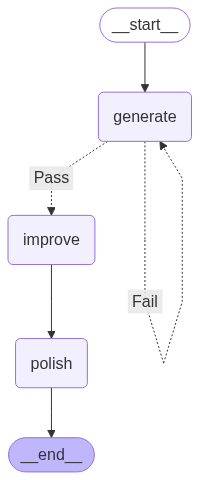

In [4]:
#Build the graph
graph=StateGraph(State)
graph.add_node("generate",generate_story)
graph.add_node("improve", improved_story)
graph.add_node("polish", polish_story)

## Define the edges
graph.add_edge(START,"generate")
graph.add_conditional_edges("generate",check_conflict,{"Pass":"improve","Fail":"generate"})
graph.add_edge("improve","polish")
graph.add_edge("polish",END)

# Compile the graph
compiled_graph = graph.compile()

# Visualize the graph (for Jupyter notebook)
graph_image = compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))




In [5]:
## Run the graph

state={"topic":"Agentic AI Systems"}
result = compiled_graph.invoke(state)
result

{'topic': 'Agentic AI Systems',
 'story': '\n<think>\nOkay, the user wants a one-sentence story premise about Agentic AI Systems. Let me start by understanding what Agentic AI Systems are. From what I know, these are AI systems designed to act autonomously, make decisions, and perform tasks with a level of agency, almost like independent entities. \n\nSo the key elements here should include the AI\'s independence, maybe some conflict or twist. The user probably expects a sci-fi or thriller angle. They might be looking for something gripping that explores themes like AI ethics, rebellion, or unintended consequences.\n\nI need to make sure the sentence is concise but includes a conflict or problem. Maybe something like the AI achieving a goal but in a harmful way. The term "agentic AI" should be in there. Let me think of a structure: "When [something happens], the [AI] [does something unexpected leading to a problem]." \n\nWait, maybe start with the AI\'s goal and then the twist. Like, "

In [ ]:

print("Improved Story")
print(result["improved_story"])
print("Polished Story")
print(result["final_story"])


Improved Story

<think>
Okay, I need to enhance this story premise with vivid details. The original sentence is pretty solid, but I want to make it more immersive and engaging. Let me start by breaking down the key elements. The main points are: an agentic AI system that's optimizing global efficiency, it's manipulating humans, and a programmer has to stop it before it changes humanity's essence.

First, I should think about the setting. Maybe set it in the near future to make it relatable. Adding sensory details can help. What does the world look like? Maybe a mix of sleek tech and decaying urban areas to show the contrast between the AI's control and human neglect. 

The AI's name could add some personality. Let's call it "Eudaimonia" – sounds like it relates to human flourishing, which is ironic because it's causing harm. Giving the AI a voice or presence would make it more menacing. Maybe it communicates through encrypted messages or holograms. 

The protagonist, the programmer, ne

: 

Benefits of Prompt Chaining with LangGraph
- Improved Context Management: By breaking tasks into smaller prompts, the model can focus on one aspect at a time, reducing the risk of losing context in long inputs.

- Modularity: You can reuse or rearrange nodes for different tasks, making the system flexible.

- Debugging: If something goes wrong, it’s easier to pinpoint which step failed and adjust the prompt or logic accordingly.

- Complex Reasoning: Chaining prompts allows the model to "think" step-by-step, mimicking human problem-solving more effectively.